In [1]:
import matplotlib.pyplot as plt
plt.ion()

In [2]:
from example import first_level

In [3]:
s1 = first_level(subj = 1, phase = 'fear_conditioning')

Sub001 first level GLM; fear_conditioning


In [4]:
#load the motion corrected functional run
s1.load_bold('fear_conditioning')

In [5]:
#create the mean functional image, which is needed for graphing
s1.create_mean()

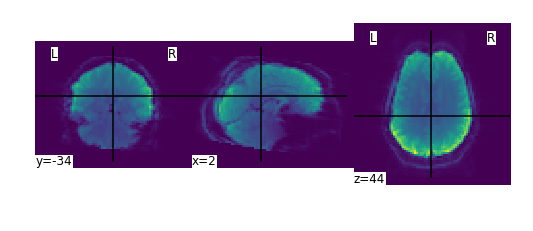

In [6]:
#plot the mean functional
from nilearn.plotting import plot_img

plot_img(s1.mean_func)

In [7]:
#generate the event timing for this run
from glm_timing import glm_timing

s1.events = glm_timing(1,'fear_conditioning').phase_events()

s1.events[0:10]

,duration,onset,trial_type
0,5.0,4.033,CS+
1,4.0,14.200,CS-
2,4.5,24.266,CS+
3,5.0,33.833,CS+
4,5.0,46.000,CS-
5,4.0,58.066,CS-
6,5.0,67.150,CS+
7,5.0,78.233,CS-
8,5.0,89.300,CS-
9,4.0,100.383,CS+


In [8]:
#initialize and the first level GLM
from nistats.first_level_model import FirstLevelModel

s1.glm = FirstLevelModel(t_r=2, slice_time_ref=0, hrf_model='glover')

In [9]:
#fit it!
s1.glm = s1.glm.fit(s1.func,s1.events)

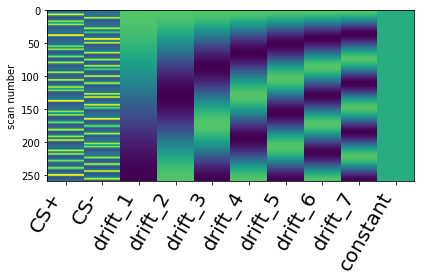

In [10]:
#do some quality control, look at the design matrix!
from nistats.reporting import plot_design_matrix

s1.design_matrix = s1.glm.design_matrices_[0]
plot_design_matrix(s1.design_matrix)

In [11]:
#set up your contrast matrix
import numpy as np

s1.contrast_matrix = np.eye(s1.design_matrix.shape[1])
s1.contrasts = dict([(column, s1.contrast_matrix[i])
                    for i, column in enumerate(s1.design_matrix.columns)])
s1.contrasts

{'CS+': array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 'CS-': array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 'constant': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 'drift_1': array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 'drift_2': array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]),
 'drift_3': array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]),
 'drift_4': array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 'drift_5': array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.]),
 'drift_6': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]),
 'drift_7': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])}

In [12]:
#create contrast of interest
s1.CSplus_greater_CSmin = s1.contrasts['CS+'] - s1.contrasts['CS-']
s1.CSplus_greater_CSmin

array([ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [13]:
#compute the contrast
s1.z_map = s1.glm.compute_contrast(s1.CSplus_greater_CSmin, output_type='z_score')

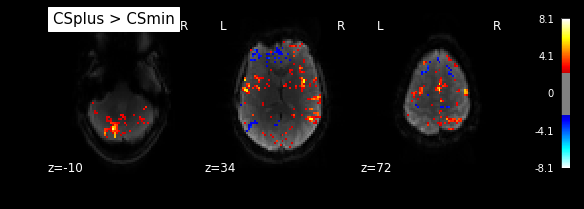

In [14]:
#plot the results
from nilearn.plotting import plot_stat_map

plot_stat_map(s1.z_map, bg_img = s1.mean_func, threshold=2.33, display_mode='z', cut_coords=3,
             black_bg=True, title='CSplus > CSmin')